# INCLUDING LIB

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
df = pd.read_csv("week5dataset.csv")

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# DATA CURATION

In [8]:
def data_presentation(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Number of unique values
        unique_values=df.nunique()

        # Make a table with the results
        table = pd.concat([mis_val, mis_val_percent,unique_values], axis=1)
        
        # Rename the columns
        table.rename(columns={0 : 'Missing Values', 1 : '% of Missing Values',2:'unique_values'},inplace=True)
        
        #Sort table by num of missing values
        table.sort_values(by=['Missing Values'], ascending=False,inplace=True)

        # Return the info dataframe 
        return table
data_presentation(df)

,Missing Values,% of Missing Values,unique_values
Credit_History,50,8.143322,2
Self_Employed,32,5.211726,2
LoanAmount,22,3.583062,203
Dependents,15,2.442997,4
Loan_Amount_Term,14,2.280130,10
Gender,13,2.117264,2
Married,3,0.488599,2
Loan_ID,0,0.000000,614
Education,0,0.000000,2
ApplicantIncome,0,0.000000,505


# DATA PROCESSING

In [9]:
# Filling the missing values of categorical colums by using the mode of all the possible entries
miss_ctg_col = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in miss_ctg_col:
    mode_v = df[col].value_counts().index[0]
    df[col].fillna(mode_v,inplace= True)

# For the numerical columns using the mean values of the observations for filling the missing entries
miss_num_col = ['LoanAmount','Loan_Amount_Term']
for col in miss_num_col:
    df[col].fillna(df[col].mean(),inplace=True)
print(df.isnull().sum())
df

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


ModuleNotFoundError: No module named 'seaborn'

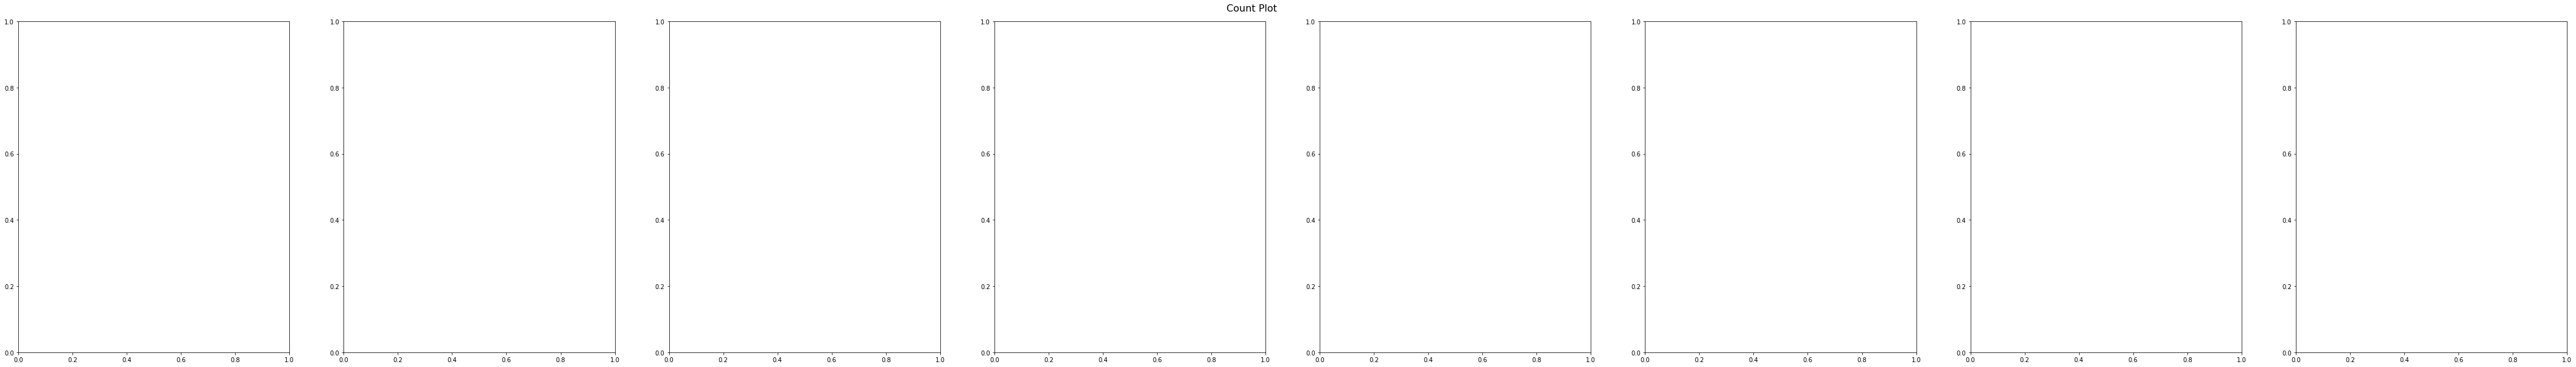

In [10]:
ctg_col_list=[col for col in df.columns if(df[col].nunique()<=10)] 
#if number of unique values is less than or equal to 10 then we consider that column as a categorical column
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,len(ctg_col_list), figsize=(75, 10))
fig.suptitle('Count Plot', fontsize=16, y=0.92)
#ABove gives an empty plot

import seaborn as sns
#Below we use to plot the count plot of each entry of any categorical column
for i, col in enumerate(ctg_col_list):
    if df[col].nunique()<=10:
        graph = sns.countplot(x=df[col], ax=ax[i])
        
# Have a doubt that the loan amount term is missing although it is categorical

In [ ]:
df.replace({
    'Gender':{'Male':1,'Female':0},
    'Married':{'No':0,'Yes':1},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
    'Education':{'Graduate':1,'Not Graduate':0},
    "Loan_Status":{'N':0,'Y':1}
    },
     inplace=True)
#Here in the reference value was equal to 4 but shoulld be 3
df.replace(to_replace='3+', value=3, inplace=True)

In [ ]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

# SPLITTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=3)
print('X_train length:',len(X_train),'X_test length:',len(X_test))
print("\nX_train dataset")
X_train

X_train length: 521 X_test length: 93

X_train dataset


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
567,1,1,3,1,0,3400,2500.0,123.000000,360.0,0.0,0
33,1,1,0,1,0,3500,1667.0,114.000000,360.0,1.0,1
88,1,0,0,1,0,8566,0.0,210.000000,360.0,1.0,2
530,1,1,0,1,0,1025,5500.0,216.000000,360.0,1.0,0
95,1,0,0,1,0,6782,0.0,146.412162,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
510,1,0,0,0,0,3598,1287.0,100.000000,360.0,1.0,0
94,1,0,0,0,0,3620,0.0,25.000000,120.0,1.0,1
278,1,1,0,1,0,14583,0.0,436.000000,360.0,1.0,1
425,1,1,0,1,0,2666,4300.0,121.000000,360.0,1.0,0


In [ ]:
#resetting the index of the data
X_train.reset_index(drop=True,inplace=True)
Y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

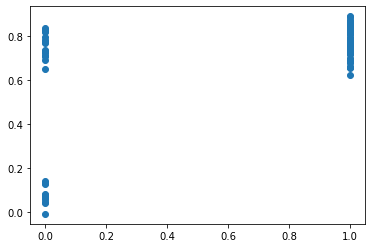

In [ ]:
plt.scatter(Y_test, Y_pred) #creating a scatter plot 

In [ ]:
y=pd.DataFrame()

y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0.070023,0
1,0.850716,1
2,0.062248,0
3,0.887072,1
4,0.623109,1
...,...,...
88,0.841660,1
89,0.853803,1
90,0.783480,1
91,0.738526,0


# LOGISTICS REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=3)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))

Accuracy :  0.8172043010752689


In [ ]:
y=pd.DataFrame()
y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
88,1,1
89,1,1
90,1,1
91,1,0


# SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8023032629558541


In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
# accuracy score on testing data
testing_data_accuray = accuracy_score(Y_pred,Y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on testing data :  0.8279569892473119


In [ ]:
y=pd.DataFrame()
y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
88,1,1
89,1,1
90,1,1
91,1,0


# DECISION TREE

In [ ]:
from sklearn.datasets import make_classification
from sklearn import tree

 
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

[Text(103.78186813186812, 212.49818181818182, 'X[9] <= 0.5\ngini = 0.43\nsamples = 521\nvalue = [163, 358]'),
 Text(36.30065934065934, 202.61454545454546, 'X[7] <= 547.5\ngini = 0.167\nsamples = 76\nvalue = [69, 7]'),
 Text(32.37626373626374, 192.73090909090908, 'X[6] <= 8115.0\ngini = 0.147\nsamples = 75\nvalue = [69, 6]'),
 Text(21.584175824175823, 182.84727272727272, 'X[5] <= 4316.5\ngini = 0.128\nsamples = 73\nvalue = [68, 5]'),
 Text(11.773186813186813, 172.96363636363637, 'X[8] <= 240.0\ngini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(7.848791208791209, 163.07999999999998, 'X[5] <= 2546.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(3.9243956043956043, 153.19636363636363, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(11.773186813186813, 153.19636363636363, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(15.697582417582417, 163.07999999999998, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(31.395164835164834, 172.96363636363637, 'X[5] <= 4934.0\ngini = 0.231\

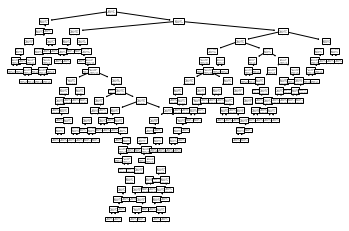

In [ ]:
tree.plot_tree(classifier)

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)
Y_pred= classifier.predict(X_test)
testing_data_accuray = accuracy_score(Y_pred,Y_test)
print('Accuracy on testng data : ', testing_data_accuray)

Accuracy on training data :  1.0
Accuracy on testng data :  0.7096774193548387


In [ ]:
y=pd.DataFrame()
y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0,0
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
88,0,1
89,1,1
90,1,1
91,0,0



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)
Y_pred= classifier.predict(X_test)
testing_data_accuray = accuracy_score(Y_pred,Y_test)
print('Accuracy on testng data : ', testing_data_accuray)

Accuracy on training data :  0.7485604606525912
Accuracy on testng data :  0.5698924731182796


In [ ]:
y=pd.DataFrame()
y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0,0
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
88,0,1
89,1,1
90,1,1
91,1,0
